**Name:** Vu Truong Si\
**Github:** vutruong99\
**USC ID:** 6031936649

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [163]:
df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")

In [164]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


**(b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows
and columns represent?
ii. Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.
iii. What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table.**

* There are **9568** rows in the dataset.
* There are **5** columns.
* The rows are data points collected from a Combined Cycle Power Plant from year 2006-2011.
* The columns represent the hourly average Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), and hourly electrical energy output (EP) of the power plant.


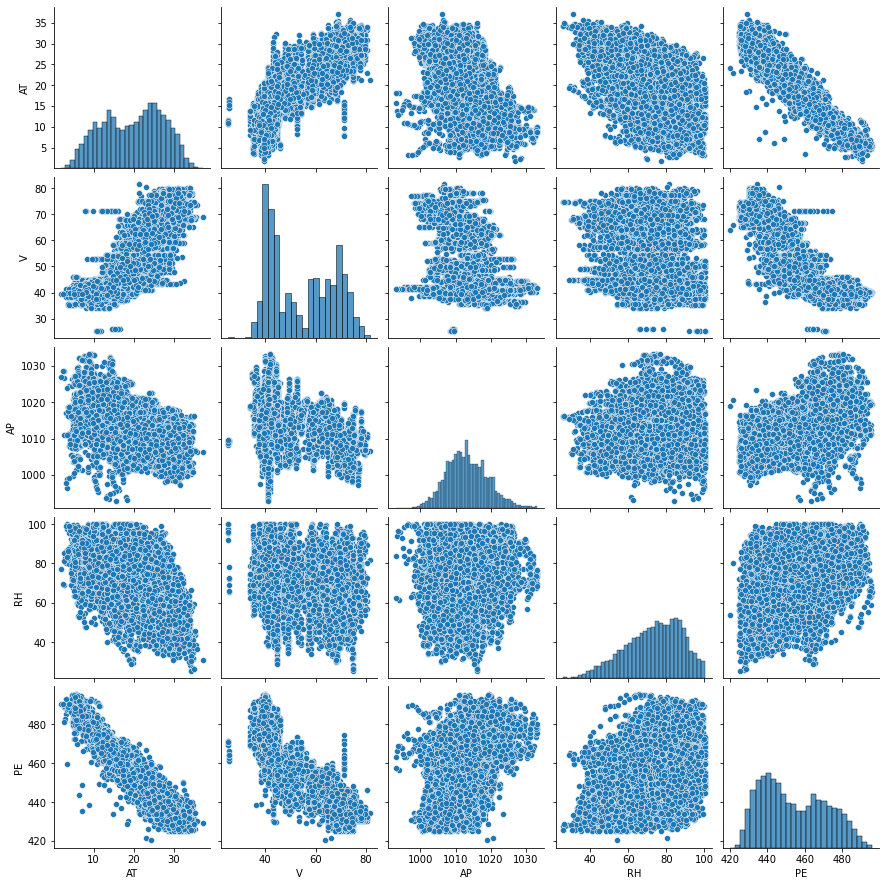

In [165]:
# Scatter plots.

sns.pairplot(df)

**Comments**

For most of the plots, there seems to be no clear correlation between the pairs. The most noticeable relationships are between AT-PE and V-PE. We can see a slight linear relationship in the plots of AT-PE and V-PE. Additionally, V and AT also demonstrate a modest linear relationship. 

In [166]:
at_mean = df["AT"].mean()
at_median = df["AT"].median()
at_range = df["AT"].max() - df["AT"].min()
at_first_quant = list(df["AT"].quantile([0.25]))[0]
at_third_quant = list(df["AT"].quantile([0.75]))[0]
at_iqr = list(df["AT"].quantile([0.75]))[0] - list(df["AT"].quantile([0.25]))[0]

In [167]:
v_mean = df["V"].mean()
v_median = df["V"].median()
v_range = df["V"].max() - df["V"].min()
v_first_quant = list(df["V"].quantile([0.25]))[0]
v_third_quant = list(df["V"].quantile([0.75]))[0]
v_iqr = list(df["V"].quantile([0.75]))[0] - list(df["V"].quantile([0.25]))[0]

In [168]:
ap_mean = df["AP"].mean()
ap_median = df["AP"].median()
ap_range = df["AP"].max() - df["AP"].min()
ap_first_quant = list(df["AP"].quantile([0.25]))[0]
ap_third_quant = list(df["AP"].quantile([0.75]))[0]
ap_iqr = list(df["AP"].quantile([0.75]))[0] - list(df["AP"].quantile([0.25]))[0]

In [169]:
rh_mean = df["RH"].mean()
rh_median = df["RH"].median()
rh_range = df["RH"].max() - df["RH"].min()
rh_first_quant = list(df["RH"].quantile([0.25]))[0]
rh_third_quant = list(df["RH"].quantile([0.75]))[0]
rh_iqr = list(df["RH"].quantile([0.75]))[0] - list(df["RH"].quantile([0.25]))[0]

In [170]:
pe_mean = df["PE"].mean()
pe_median = df["PE"].median()
pe_range = df["PE"].max() - df["PE"].min()
pe_first_quant = list(df["PE"].quantile([0.25]))[0]
pe_third_quant = list(df["PE"].quantile([0.75]))[0]
pe_iqr = list(df["PE"].quantile([0.75]))[0] - list(df["PE"].quantile([0.25]))[0]

In [171]:
stats_summary = {"AT" : [at_mean, at_median, at_range, at_first_quant, at_third_quant, at_iqr],
                 "V" : [v_mean, v_median, v_range, v_first_quant, v_third_quant, v_iqr],
                 "AP" : [ap_mean, ap_median, ap_range, ap_first_quant, ap_third_quant, ap_iqr],
                 "RH" : [rh_mean, rh_median, rh_range, rh_first_quant, rh_third_quant, rh_iqr],
                 "PE" : [pe_mean, pe_median, pe_range, pe_first_quant, pe_third_quant, pe_iqr]}

In [172]:
stats_summary_df = pd.DataFrame(stats_summary, index=['mean','median','range','first_quantile','third_quantile','interquantile range'])

In [173]:
# Summary table of the statistics.

stats_summary_df

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
first_quantile,13.510000,41.740000,1009.100000,63.327500,439.750000
third_quantile,25.720000,66.540000,1017.260000,84.830000,468.430000
interquantile range,12.210000,24.800000,8.160000,21.502500,28.680000


#### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [174]:
at = df[["AT"]]
v = df[["V"]]
ap = df[["AP"]]
rh = df[["RH"]]
# ---------------- #
y = df["PE"]

In [175]:
# Ambient Temperature vs Energy Ouput.

X_at = sm.add_constant(at)
model = sm.OLS(y, X_at).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:43   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

**Comments**

* R-square represents the fit of the model, here we have a high R-squared: 0.899, so we can conclude that our fits the dataset pretty well.
* The standard error is 0.007 which is very low, so the accuracy of our model is high.
* The p-value is extremely small and is rounded so we see 0.000, we can reject the null hypothesis and conclude that there is a strong relationship between AT and PE and AT is statistically significant.

In [176]:
# Coefficient of AT in simple LR.

at_coefficient = model.params[1]
print(at_coefficient)

-2.1713199585178002


<AxesSubplot:xlabel='AT', ylabel='PE'>

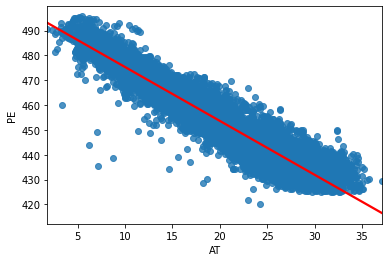

In [177]:
# Plot to back up assertions.

sns.regplot(x = df.AT, y= df.PE, line_kws = {"color": "red"})

<AxesSubplot:xlabel='AT'>

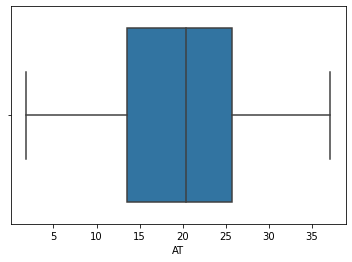

In [178]:
# Explore outliers using boxplot.

# There does not seem to be outliers in the AT column.

sns.boxplot(x = df["AT"])

In [179]:
# Exhaust Vacuum vs Energy Ouput.

X_v = sm.add_constant(v)
model = sm.OLS(y, X_v).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:44   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

**Comments**

* R-square represents the fit of the model, here we have a fairly high R-squared: 0.757, so we can conclude that our model fits the dataset relatively well.
* The standard error is 0.007 which is low, so the accuracy of our model is high.
* The p-value is extremely small and rounded so that we can only see 0.000, we can conclude that there is a strong relationship between V and PE and V is statistically significant.

In [180]:
# Coefficient of V in simple LR.

v_coefficient = model.params[1]
print(v_coefficient)

-1.1681351265557094


<AxesSubplot:xlabel='V', ylabel='PE'>

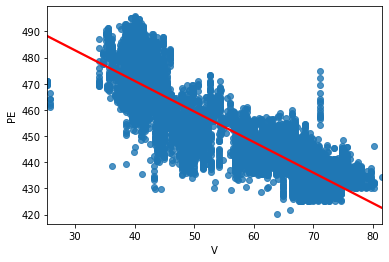

In [181]:
# Plot to back up assertions.

sns.regplot(x = df.V, y= df.PE, line_kws = {"color": "red"})

<AxesSubplot:xlabel='V'>

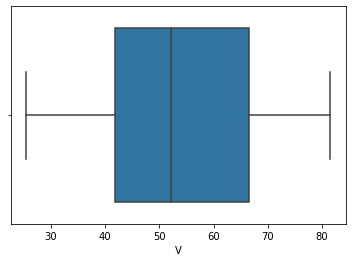

In [182]:
# Explore outliers using boxplot.

# There does not seem to be outliers in the V column.

sns.boxplot(x = df["V"])

In [183]:
# Ambient Pressure vs Energy Ouput.

X_ap = sm.add_constant(ap)
model = sm.OLS(y, X_ap).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:46   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

**Comments**

* R-square represents the fit of the model, here we have a fairly low R-squared: 0.269, so we can conclude that our model does not fit the dataset well.
* The standard error is 0.025 which is low, so the accuracy of our model is high.
* The p-value is extremely small and rounded so that we can only see 0.000, we can conclude that there is a strong relationship between AP and PE and AP is statistically significant.

In [184]:
# Coefficient of AP in simple LR.

ap_coefficient = model.params[1]
print(ap_coefficient)

1.4898716733991142


<AxesSubplot:xlabel='AP', ylabel='PE'>

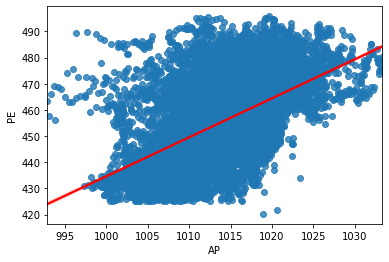

In [185]:
# Plot to back up assertions.

sns.regplot(x = df.AP, y= df.PE, line_kws = {"color": "red"})

<AxesSubplot:xlabel='AP'>

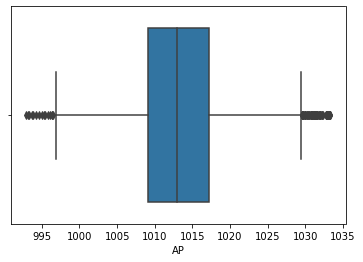

In [186]:
# Explore outliers using boxplot.

# There seems to be outliers in the AP column.

sns.boxplot(x = df["AP"])

In [187]:
# Relative Humidity vs Energy Ouput.

X_rh = sm.add_constant(rh)
model = sm.OLS(y, X_rh).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:47   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

**Comments**

* R-square represents the fit of the model, here we have a fairly low R-squared: 0.152, so we can conclude that our model does not fit the dataset well.
* The standard error is 0.011 which is low, so the accuracy of our model is high.
* The p-value is extremely small and rounded so that we can only see 0.000, we can conclude that there is a strong relationship between RH and PE and RH is statistically significant.

In [188]:
# Coefficient of RH in simple LR.

rh_coefficient = model.params[1]
print(rh_coefficient)

0.455650102262979


<AxesSubplot:xlabel='RH', ylabel='PE'>

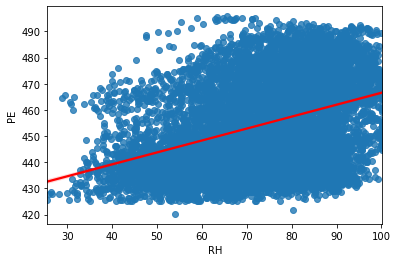

In [189]:
# Plot to back up assertions.

sns.regplot(x = df.RH, y= df.PE, line_kws = {"color": "red"})

<AxesSubplot:xlabel='RH'>

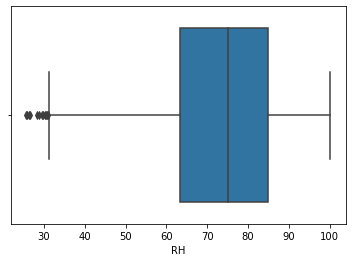

In [190]:
# Explore outliers using boxplot.

# There seems to be outliers in the AP column.

sns.boxplot(x = df["RH"])

<AxesSubplot:xlabel='PE'>

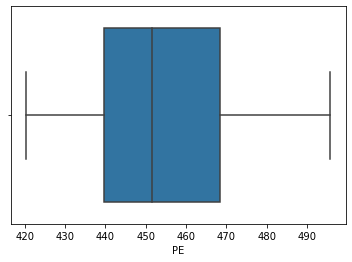

In [191]:
# Explore outliers using boxplot.

# There seems to be outliers in the PE column.

sns.boxplot(x = df["PE"])

In [192]:
simple_lr_coefficients = [at_coefficient, v_coefficient, ap_coefficient, rh_coefficient]

#### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : Bj = 0?

In [193]:
X = df[['AT','V','AP','RH']]
X_all = sm.add_constant(X)
model = sm.OLS(y, X_all).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:48   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

**Answer**

From the summary table, the p values of all the variables are extremely small, therefore we reject all the null hypotheses that state B(j) = 0 and keep all features.

In [194]:
# Coefficients of the 4 features in multi LR. 

print(model.params)

const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64


In [195]:
at_mcoefficient = model.params[1]
v_mcoefficient = model.params[2]
ap_mcoefficient = model.params[3]
rh_mcoefficient = model.params[4]

In [196]:
multi_lr_coefficients = [at_mcoefficient, v_mcoefficient, ap_mcoefficient, rh_mcoefficient]

**(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.**

In [197]:
lr_coefficients = pd.DataFrame(list(zip(simple_lr_coefficients, multi_lr_coefficients, ["AT", "V", "AP", "RH"])), columns = ["simple LR coefficient", "multi LR coefficient","Features"])

In [198]:
# Summary table of the coefficients in 5 models.

lr_coefficients

,simple LR coefficient,multi LR coefficient,Features
0,-2.171320,-1.977513,AT
1,-1.168135,-0.233916,V
2,1.489872,0.062083,AP
3,0.455650,-0.158054,RH


**Answer**

We can see that we get slightly different coefficients from two Linear Regression models. Overall, the coefficients for the multi Linear Regression model are smaller. Specifically:
* AT **-2.17** -> **-1.97**
* V **-1.16** -> -**0.23**
* AP **1.48** -> **0.06**
* RH **0.45** -> **-0.15**.

<AxesSubplot:xlabel='simple LR coefficient', ylabel='multi LR coefficient'>

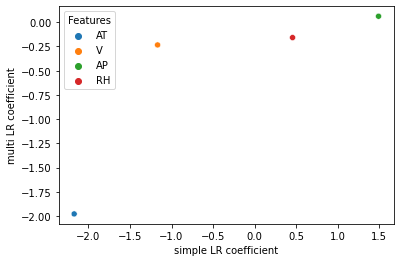

In [199]:
# Plot to compare the coefficients in 5 models.

sns.scatterplot(x = "simple LR coefficient", y = "multi LR coefficient", hue = "Features", data = lr_coefficients)

#### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = B0 + B1X + B2X^2 + B3X^3 + E

In [200]:
# Polynomial terms for AT.

poly = PolynomialFeatures(3)
at_poly = poly.fit_transform(at)

In [201]:
model = sm.OLS(y, at_poly).fit()
print(model.summary(xname = ["const","AT","AT^2","AT^3"]))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:49   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

**Answer**

Since all the p values of the polynomial terms of AT are < 0.05, we can conclude that there is evidence of nonlinear association between AT and EP.

In [202]:
# Polynomial terms of V. 

poly = PolynomialFeatures(3)
v_poly = poly.fit_transform(v)

In [203]:
model = sm.OLS(y, v_poly).fit()
print(model.summary(xname = ["const","V","V^2","V^3"]))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:49   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

**Answer**

We see that the p value of V^2 is > 0.05, however those of V and V^3 are << 0.05. We can conclude that there is still a nonlinear relationship between V and EP

In [204]:
# Polynomial terms of AP.

poly = PolynomialFeatures(3)
ap_poly = poly.fit_transform(ap)

In [205]:
model = sm.OLS(y, ap_poly).fit()
print(model.summary(xname = ["const","AP","AP^2","AP^3"]))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:49   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

**Answer**

All the p values of the polynomial terms are extremely small, therefore we can conclude that there is a nonlinear association between AP and EP.

In [206]:
# Polynomial terms of RH.

poly = PolynomialFeatures(3)
rh_poly = poly.fit_transform(rh)

In [207]:
model = sm.OLS(y, rh_poly).fit()
print(model.summary(xname = ["const","RH","RH^2","RH^3"]))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:49   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

**Answer**

All the p values of the polynomial terms are extremely small, therefore we can conclude that there is a nonlinear association between RH and EP.

#### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [208]:
X = df[['AT','V','AP','RH']]

In [209]:
poly = PolynomialFeatures(interaction_only=True)

In [210]:
X_interactions_only = poly.fit_transform(X)

In [211]:
X_interactions_only

array([[1.00000000e+00, 1.49600000e+01, 4.17600000e+01, ...,
        4.27651632e+04, 3.05557920e+03, 7.49312019e+04],
       [1.00000000e+00, 2.51800000e+01, 6.29600000e+01, ...,
        6.42217184e+04, 3.71967680e+03, 6.02639632e+04],
       [1.00000000e+00, 5.11000000e+00, 3.94000000e+01, ...,
        3.98791040e+04, 3.63031600e+03, 9.32604224e+04],
       ...,
       [1.00000000e+00, 3.13200000e+01, 7.43300000e+01, ...,
        7.52903436e+04, 2.71155840e+03, 3.69513216e+04],
       [1.00000000e+00, 2.44800000e+01, 6.94500000e+01, ...,
        7.04125770e+04, 4.33298550e+03, 6.32547254e+04],
       [1.00000000e+00, 2.16000000e+01, 6.25200000e+01, ...,
        6.35972196e+04, 4.24323240e+03, 6.90394001e+04]])

In [212]:
model = sm.OLS(y, X_interactions_only).fit()
print(model.summary(xname = ["const","AT","V","AP","RH","AT_V","AT_AP","AT_RH","V_AP","V_RH","AP_RH"]))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:49   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

**Answer**

Looking at the interaction terms, we see that AT_AP and V_RH are not statistically significant due to there large p values. The other interaction terms (AT_V, AT_RH, V_AP, AP_RH) are significant.

#### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Model on all predictors**

In [214]:
# All predictors.

X_all = sm.add_constant(X_train)
model = sm.OLS(y_train, X_all).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:49   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

In [215]:
y_pred_train = model.predict(X_all)
y_pred_test = model.predict(sm.add_constant(X_test))

In [216]:
print("Training MSE for LR with 4 predictors:", mean_squared_error(y_train, y_pred_train))
print("Test MSE for LR with 4 predictors:", mean_squared_error(y_test, y_pred_test))

Training MSE for LR with 4 predictors: 20.580839725738702
Test MSE for LR with 4 predictors: 21.239856938225532


**Model on interaction terms and polynomials**

In [217]:
# Polynomial features.

poly = PolynomialFeatures()

In [218]:
X_interactions_and_quads = poly.fit_transform(X_train)
X_interactions_and_quads_test = poly.fit_transform(X_test)

In [219]:
X_interactions_and_quads

array([[1.00000000e+00, 1.66900000e+01, 4.47800000e+01, ...,
        1.02092837e+06, 5.87856538e+04, 3.38491240e+03],
       [1.00000000e+00, 2.41200000e+01, 5.86600000e+01, ...,
        1.02323340e+06, 5.96409880e+04, 3.47628160e+03],
       [1.00000000e+00, 9.08000000e+00, 4.00200000e+01, ...,
        1.06337344e+06, 7.76906080e+04, 5.67611560e+03],
       ...,
       [1.00000000e+00, 2.77900000e+01, 6.92300000e+01, ...,
        1.02588538e+06, 4.62978306e+04, 2.08940410e+03],
       [1.00000000e+00, 1.22600000e+01, 4.15000000e+01, ...,
        1.02996112e+06, 9.07395267e+04, 7.99414810e+03],
       [1.00000000e+00, 1.17500000e+01, 4.05500000e+01, ...,
        1.03650725e+06, 9.94673930e+04, 9.54529000e+03]])

In [220]:
y_train = y_train.reset_index(drop = True)

In [221]:
model = sm.OLS(y_train, X_interactions_and_quads).fit()
print(model.summary(xname = ["const","AT","V","AP","RH","AT^2","AT_V","AT_AP","AT_RH","V^2","V_AP","V_RH","AP^2","AP_RH","RH^2"]))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:49   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

**Answer**

Looking at the summary, we see that V and some of its related terms have high p values (> 0.05). Generally, if the variable is statistically insignificant but its polynomials or interaction terms are, we can keep that variable. Here we can see that while V^2, V_AP, and V_RH are insignificant, AT_V is, so we will keep V and AT_V. Also, AT_AP is removed for having p value > 0.05. 

In conclusion, V^2, V_AP, V_RH, and AT_AP are removed.

In [222]:
y_pred_train = model.predict(X_interactions_and_quads)
y_pred_test = model.predict(X_interactions_and_quads_test)

In [223]:
print("Training MSE for LR with 14 predictors:", mean_squared_error(y_train, y_pred_train))
print("Test MSE for LR with 14 predictors:", mean_squared_error(y_test, y_pred_test))

Training MSE for LR with 14 predictors: 17.887799616633348
Test MSE for LR with 14 predictors: 18.647312478597414


**Note**

We can see that including the interaction terms and quadratic nonlinearities helped improve the errors of the model.

**Model after removing insignificant terms**

In [224]:
# Removing the insignificant terms.

cleaned_X_train = pd.DataFrame(X_interactions_and_quads, columns = ["const","AT","V","AP","RH","AT^2","AT_V","AT_AP","AT_RH","V^2","V_AP","V_RH","AP^2","AP_RH","RH^2"]).drop(["V^2","V_AP","V_RH","AT_AP"], axis = 1)
cleaned_X_test = pd.DataFrame(X_interactions_and_quads_test, columns = ["const","AT","V","AP","RH","AT^2","AT_V","AT_AP","AT_RH","V^2","V_AP","V_RH","AP^2","AP_RH","RH^2"]).drop(["V^2","V_AP","V_RH","AT_AP"], axis = 1)

In [225]:
cleaned_X_train

,const,AT,V,AP,RH,AT^2,AT_V,AT_RH,AP^2,AP_RH,RH^2
0,1.0,16.69,44.78,1010.41,58.18,278.5561,747.3782,971.0242,1.020928e+06,58785.6538,3384.9124
1,1.0,24.12,58.66,1011.55,58.96,581.7744,1414.8792,1422.1152,1.023233e+06,59640.9880,3476.2816
2,1.0,9.08,40.02,1031.20,75.34,82.4464,363.3816,684.0872,1.063373e+06,77690.6080,5676.1156
3,1.0,9.60,41.82,1032.93,72.63,92.1600,401.4720,697.2480,1.066944e+06,75021.7059,5275.1169
4,1.0,20.77,56.85,1012.40,83.63,431.3929,1180.7745,1736.9951,1.024954e+06,84667.0120,6993.9769
...,...,...,...,...,...,...,...,...,...,...,...
6692,1.0,23.39,61.87,1010.35,48.91,547.0921,1447.1393,1144.0049,1.020807e+06,49416.2185,2392.1881
6693,1.0,11.63,40.55,1022.89,87.12,135.2569,471.5965,1013.2056,1.046304e+06,89114.1768,7589.8944
6694,1.0,27.79,69.23,1012.86,45.71,772.2841,1923.9017,1270.2809,1.025885e+06,46297.8306,2089.4041
6695,1.0,12.26,41.50,1014.87,89.41,150.3076,508.7900,1096.1666,1.029961e+06,90739.5267,7994.1481


In [226]:
cleaned_X_test

,const,AT,V,AP,RH,AT^2,AT_V,AT_RH,AP^2,AP_RH,RH^2
0,1.0,19.64,48.06,1014.81,74.96,385.7296,943.8984,1472.2144,1.029839e+06,76070.1576,5619.0016
1,1.0,28.26,69.23,1013.01,42.10,798.6276,1956.4398,1189.7460,1.026189e+06,42647.7210,1772.4100
2,1.0,27.98,67.17,1007.32,75.29,782.8804,1879.4166,2106.6142,1.014694e+06,75841.1228,5668.5841
3,1.0,28.64,69.23,1013.11,37.13,820.2496,1982.7472,1063.4032,1.026392e+06,37616.7743,1378.6369
4,1.0,9.34,38.08,1019.56,67.74,87.2356,355.6672,632.6916,1.039503e+06,69064.9944,4588.7076
...,...,...,...,...,...,...,...,...,...,...,...
2866,1.0,17.90,48.98,1014.17,80.40,320.4100,876.7420,1439.1600,1.028541e+06,81539.2680,6464.1600
2867,1.0,29.70,57.35,1005.63,57.35,882.0900,1703.2950,1703.2950,1.011292e+06,57672.8805,3289.0225
2868,1.0,12.52,41.44,1016.08,68.94,156.7504,518.8288,863.1288,1.032419e+06,70048.5552,4752.7236
2869,1.0,9.75,40.81,1026.00,84.44,95.0625,397.8975,823.2900,1.052676e+06,86635.4400,7130.1136


In [227]:
model = sm.OLS(y_train, cleaned_X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:50   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.046e+04   1091.512     -9.581      0.0

In [228]:
y_pred_train = model.predict(cleaned_X_train)
y_pred_test = model.predict(cleaned_X_test)

In [229]:
print("Training MSE for LR after removing insignificant terms:", mean_squared_error(y_train, y_pred_train))
print("Test MSE for LR after removing insignificant terms:", mean_squared_error(y_test, y_pred_test))

Training MSE for LR after removing insignificant terms: 17.917812671185914
Test MSE for LR after removing insignificant terms: 18.694346190815022


#### (i) KNN Regression: i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k = (1,2,...,100) that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [230]:
# KNN with normalized features.

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [231]:
test_errors = []
train_errors = []
best_k = 0 
min_test_error = 9999999
for i in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred_train = knn.predict(X_train_scaled)
    y_pred_test = knn.predict(X_test_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test,y_pred_test)
    
    if mse_test < min_test_error:
        min_test_error = mse_test
        best_k = i
    test_errors.append(mse_test)
    train_errors.append(mse_train)

In [232]:
print("Min test error for normalized features KNN:", min_test_error)

Min test error for normalized features KNN: 17.03372663114757


In [233]:
print("Best k for normalized features KNN:", best_k)

Best k for normalized features KNN: 9


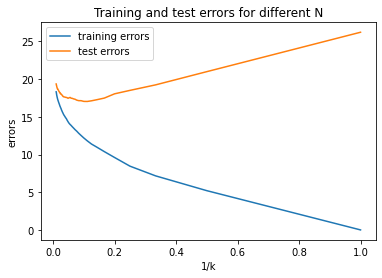

In [234]:
x = np.arange(1,101,1)
x = 1/x
y1 = np.array(train_errors)
y2 = np.array(test_errors)

plt.figure() 
plt.plot(x,y1, label = "training errors")
plt.plot(x,y2, label = "test errors")
plt.xlabel('1/k')
plt.ylabel('errors')
plt.legend(loc="upper left")
plt.title("Training and test errors for different N")
plt.show() 

In [235]:
# KNN with raw features.

test_errors = []
train_errors = []
best_k = 0 
min_test_error = 9999999
for i in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test,y_pred_test)
    
    if mse_test < min_test_error:
        min_test_error = mse_test
        best_k = i
    test_errors.append(mse_test)
    train_errors.append(mse_train)

In [236]:
print("Min test error for raw features KNN:", min_test_error)

Min test error for raw features KNN: 15.726819842563568


In [237]:
print("Best k for raw features KNN:", best_k)

Best k for raw features KNN: 5


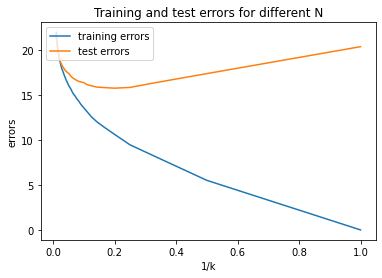

In [238]:
x = np.arange(1,101,1)
x = 1/x
y1 = np.array(train_errors)
y2 = np.array(test_errors)

plt.figure() 
plt.plot(x,y1, label = "training errors")
plt.plot(x,y2, label = "test errors")
plt.xlabel('1/k')
plt.ylabel('errors')
plt.legend(loc="upper left")
plt.title("Training and test errors for different N")
plt.show() 

#### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

* The linear regression model that has the smallest test error is the LR model that contains all the interaction terms and quadratic nonlinearities. Test MSE for it is **18.64**.
* The KNN regression model that has the smallest test error is the KNN model with raw features and k = 5. Test MSE for it is **15.72**.

KNN model performed better on this dataset compared to the Linear Regression Model. The reason for this is probably due to the fact that there were non-linear relationship between the predictors and the response, and KNN is generally a more flexible model than LR when it comes to dealing with non-linearity.

#### 2.4.1.

#### Answer
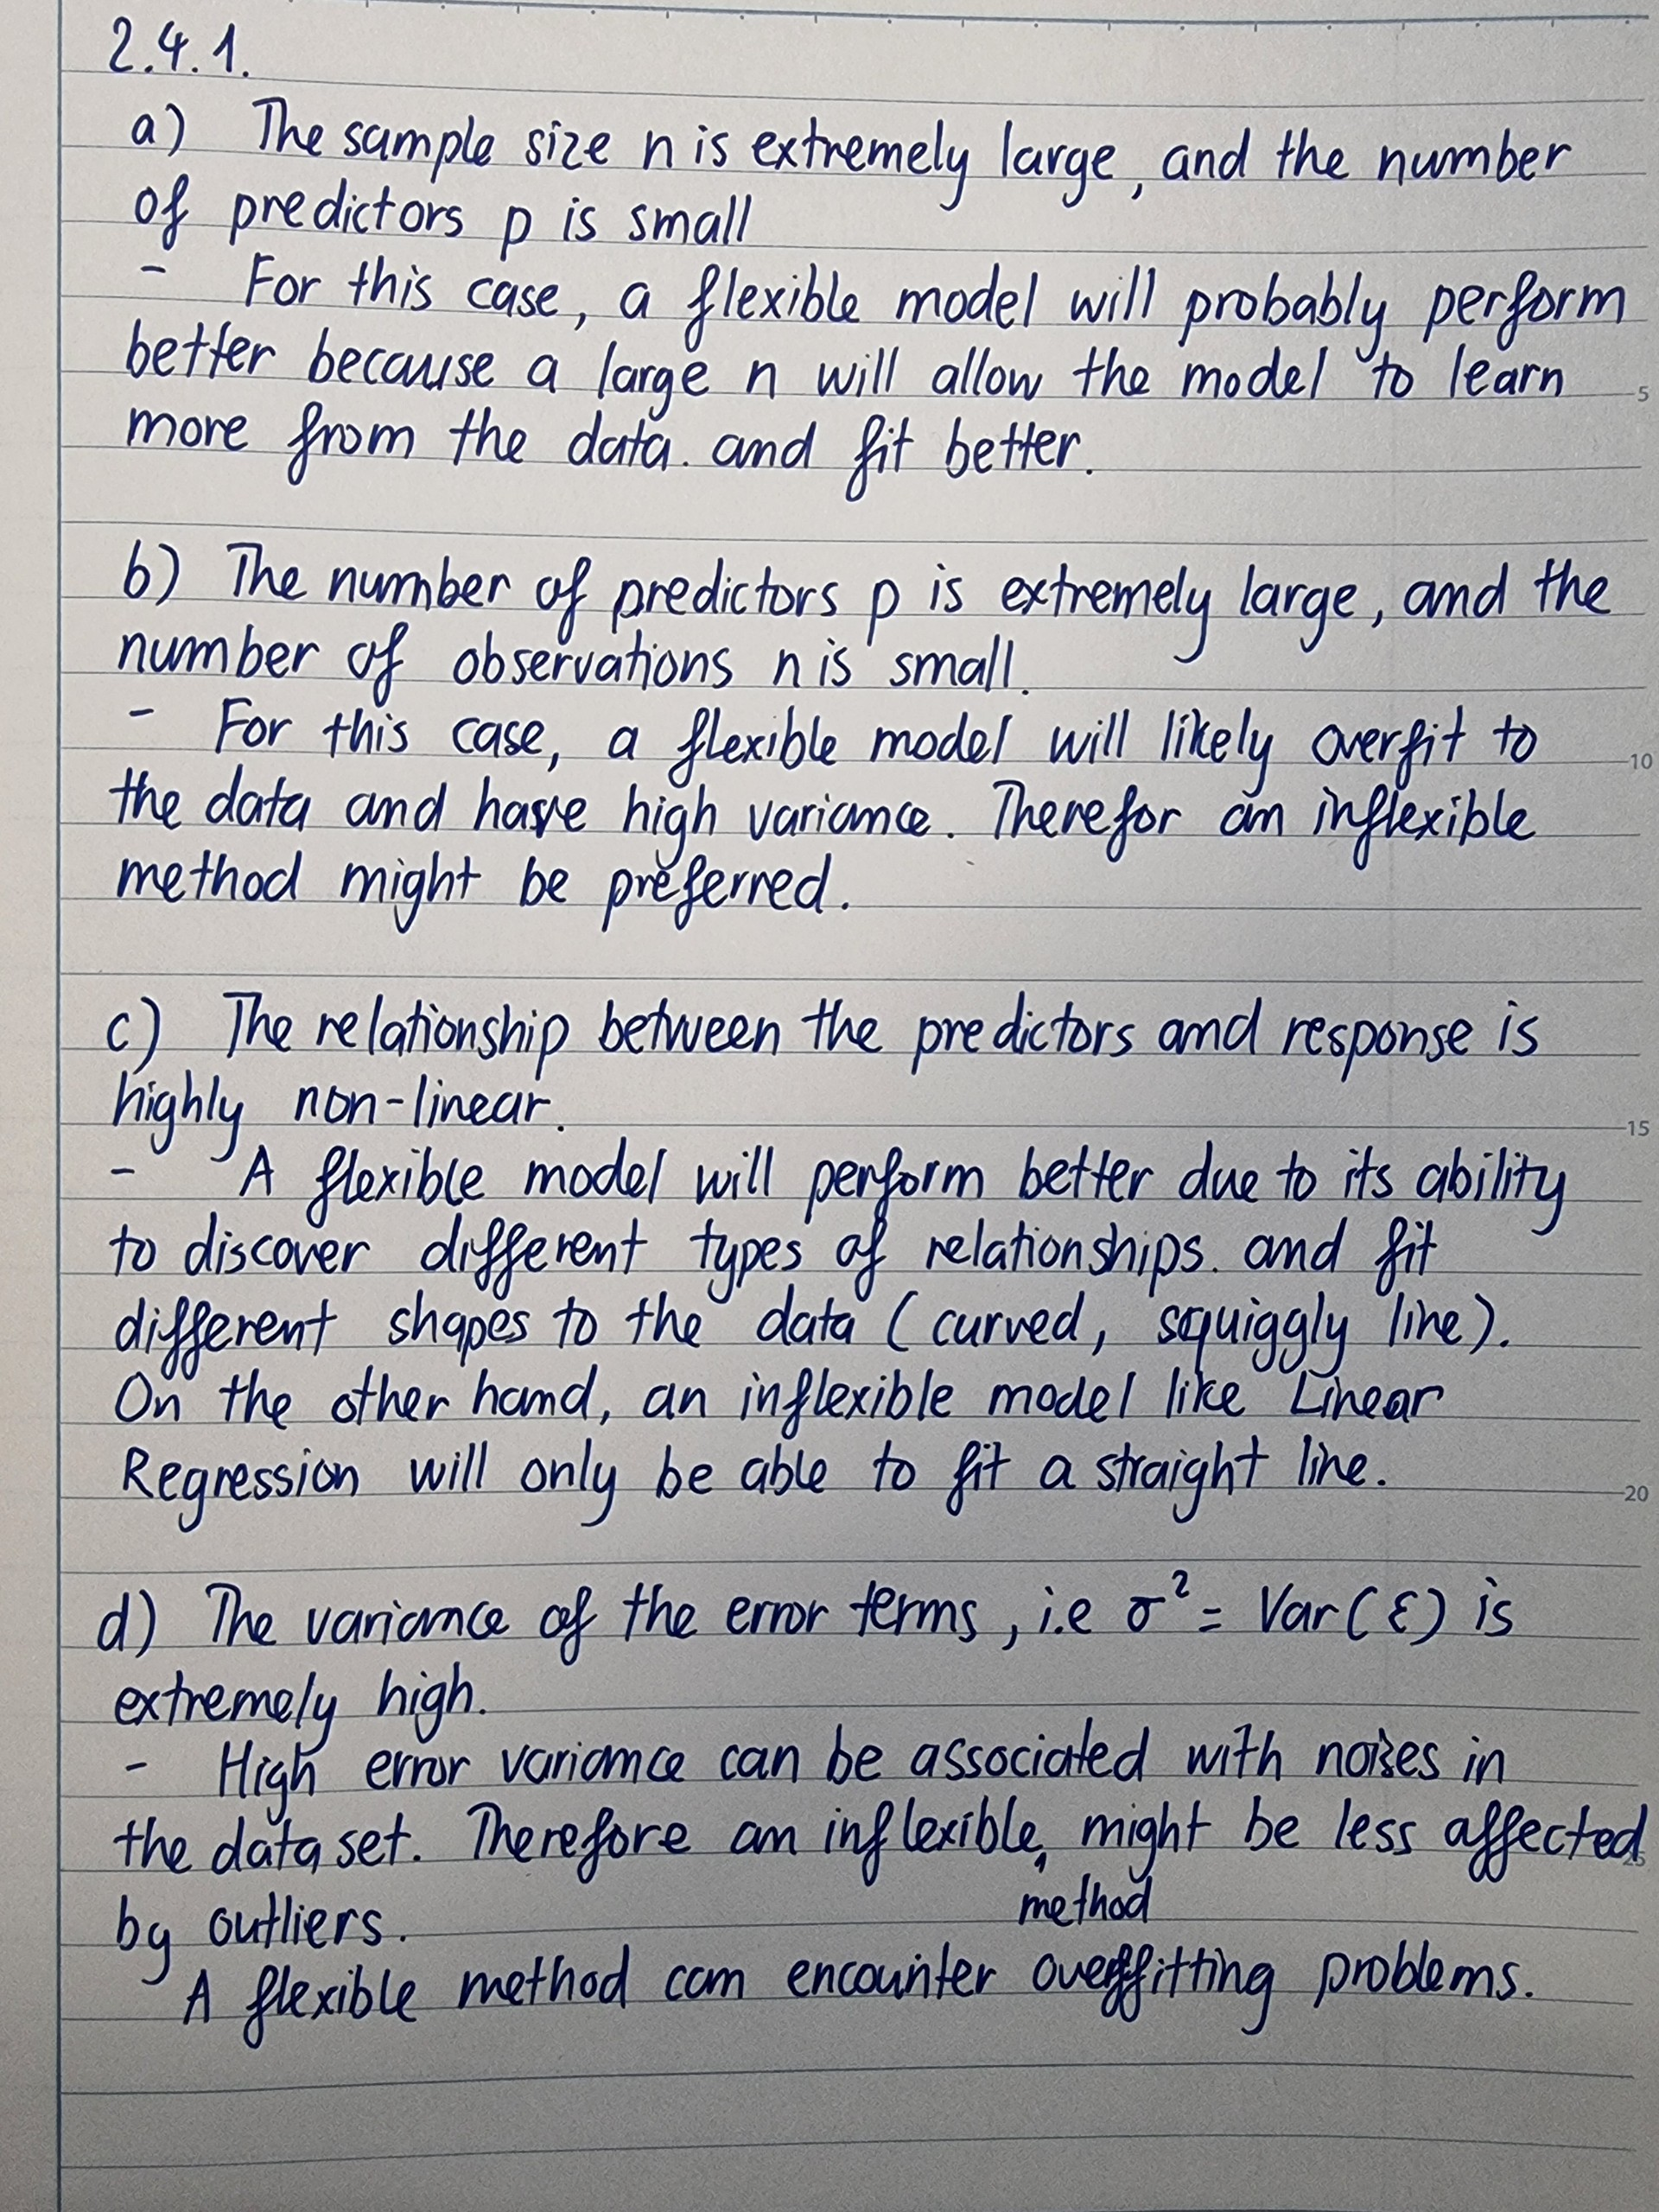

#### 2.4.7.

#### Answer
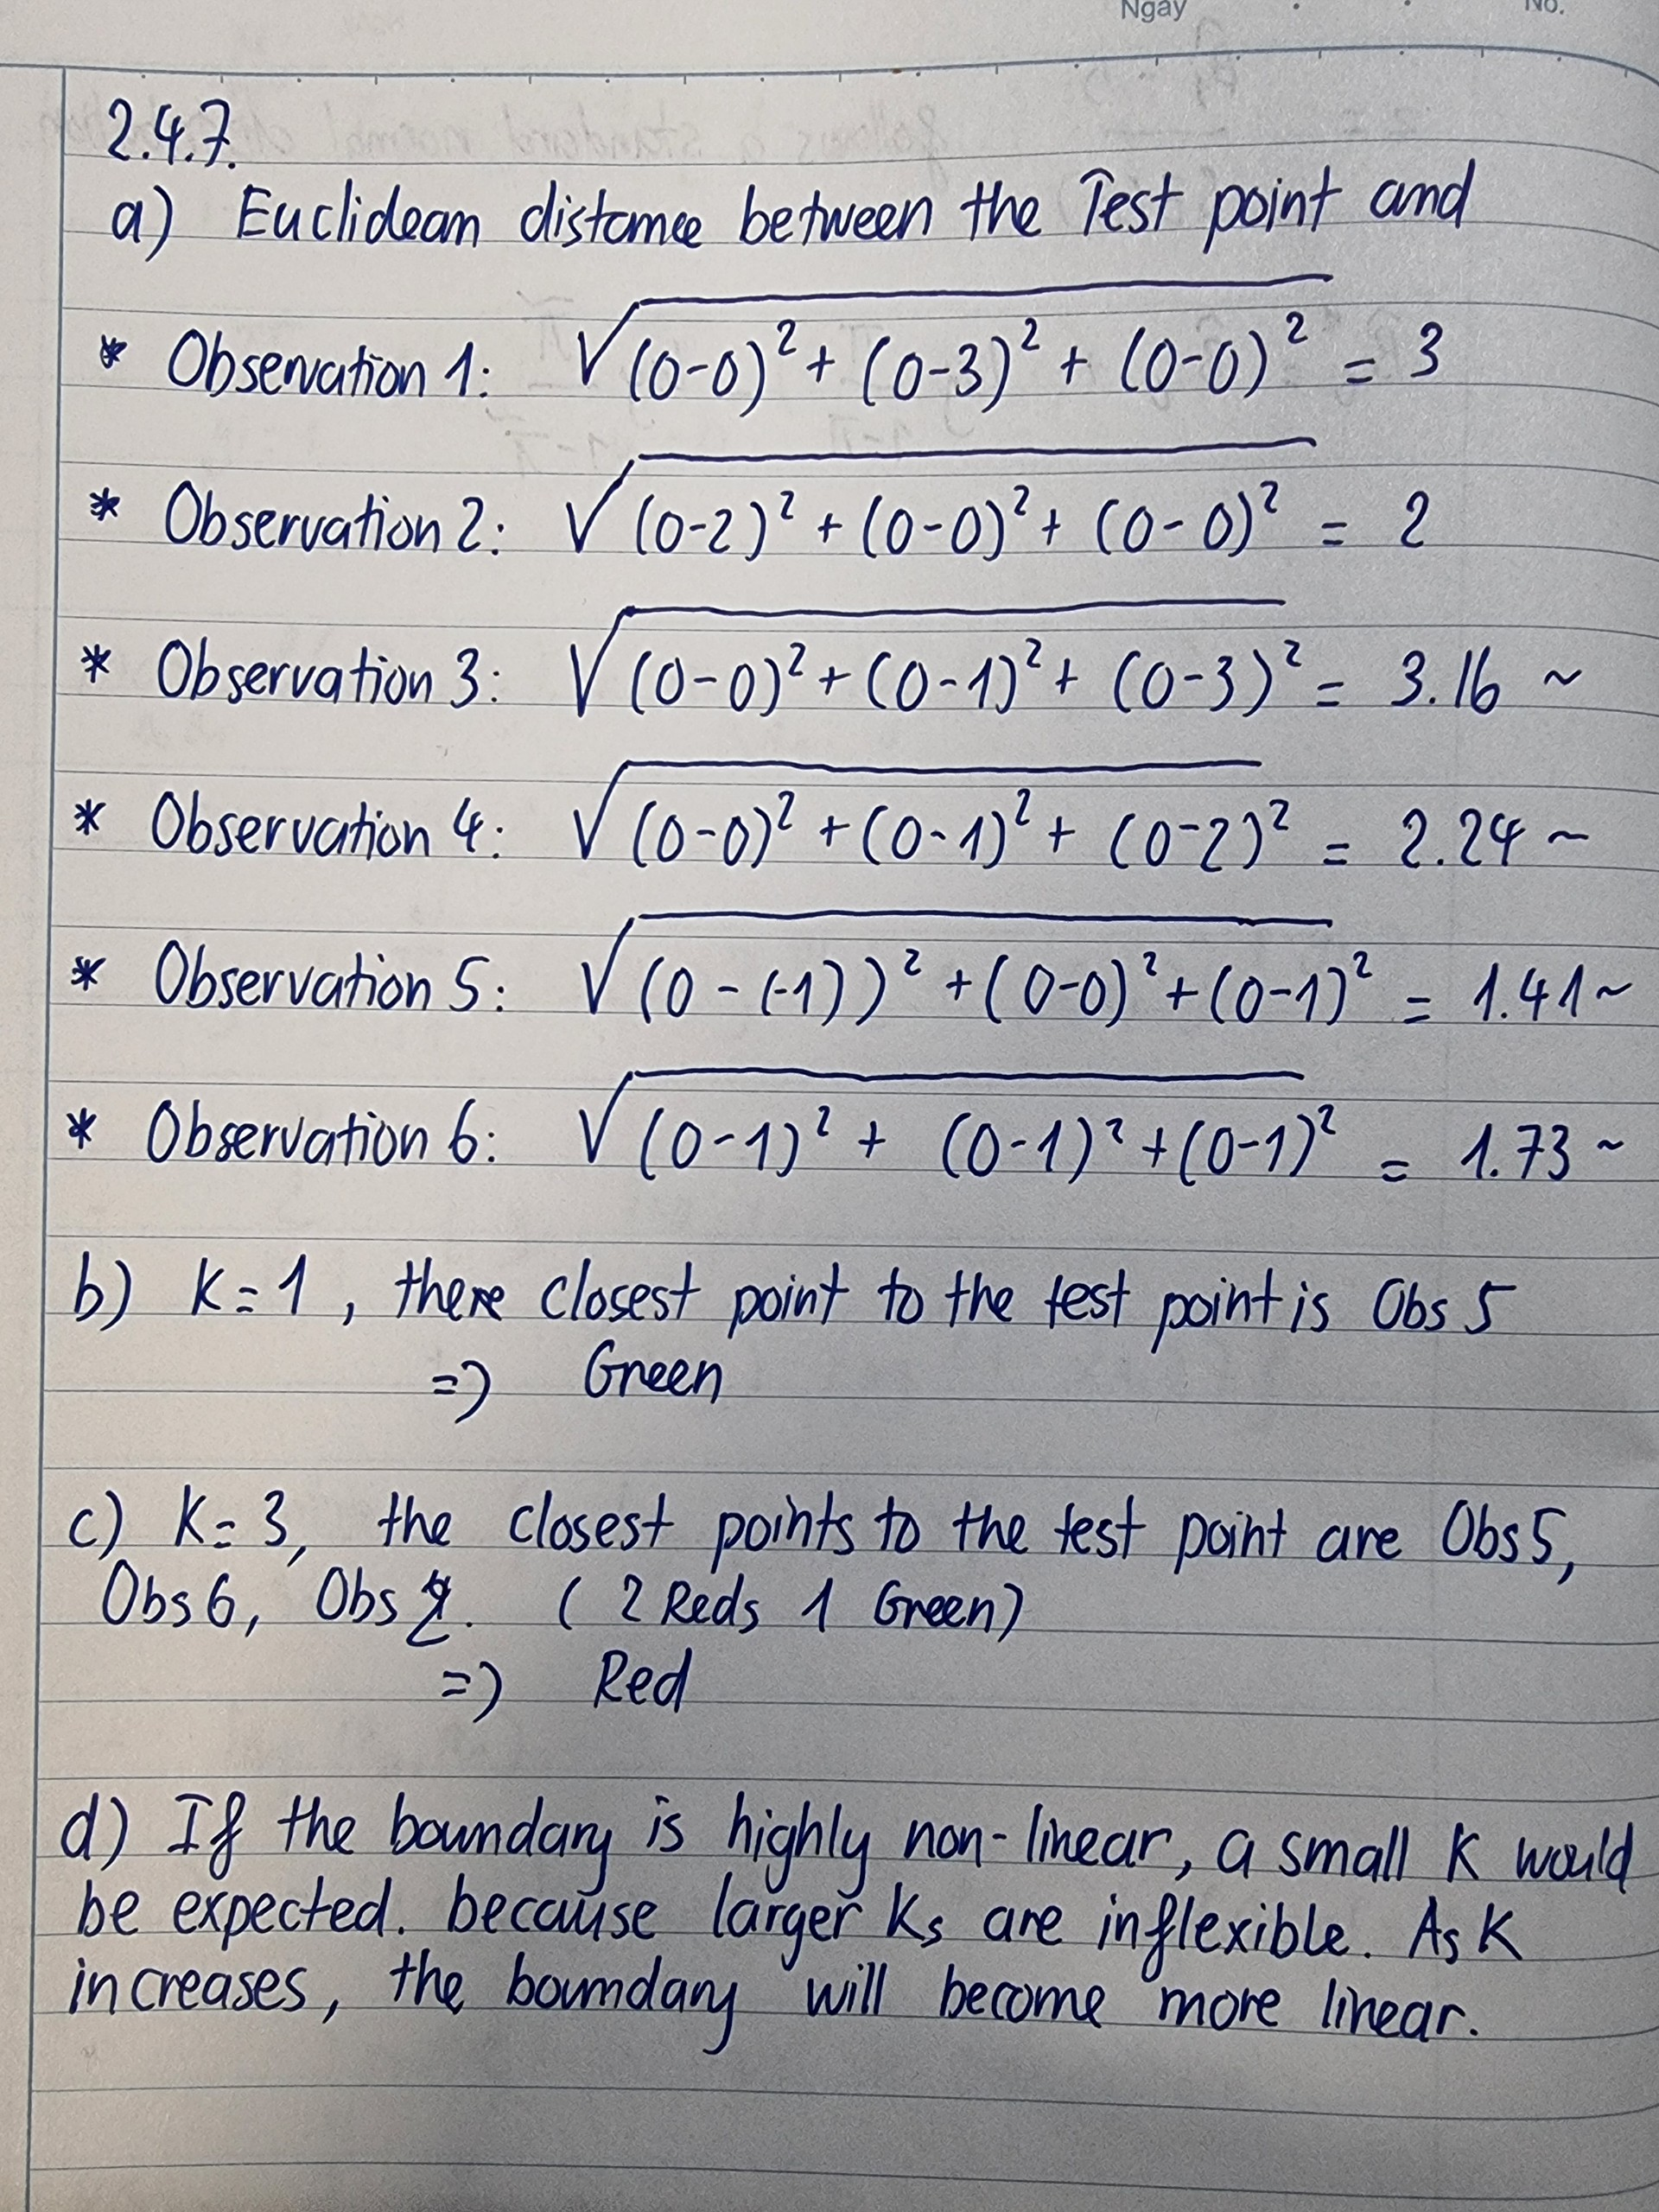
